### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('coupons.csv')

In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
#Check for missing data.
data.isnull().sum()
# There are 6 coulmns with missing data with car missing almost all the data 12,576 out of 12,684 rows. 

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [5]:
# Check column data types
data.dtypes
# there a lot of non-numerica columns such as temp etc, that are preseneted as ranges. 

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
#The car column will be removed becuase is almost completely empty of data and is not of significant use. 
#Rows with null values will be removed becuase the dataset is still large enough with the remaining data
#A total of 605 rows were removed %5 of the data
data.drop(['car'], axis = 1)
data = data.dropna(subset=['Bar', 'CoffeeHouse','CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])
data.shape

(12079, 26)

4. What proportion of the total observations chose to accept the coupon? 



In [7]:
print("Percent accepting coupon:", "{:.2%}".format(data['Y'].value_counts()[1] / len(data) ))


Percent accepting coupon: 56.93%


5. Use a bar plot to visualize the `coupon` column.

Text(0, 0.5, 'Percent Acceptance')

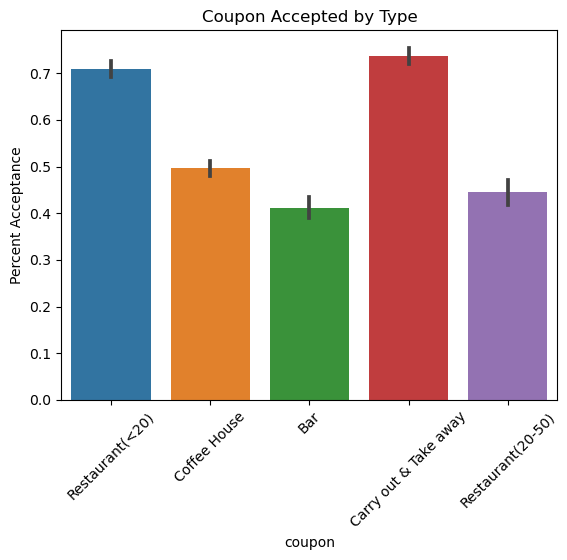

In [8]:
sns.barplot(data, x = "coupon", y = "Y")
plt.xticks(rotation=45)
plt.title("Coupon Accepted by Type")
plt.xlabel("coupon")
plt.ylabel("Percent Acceptance")

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Distribution by Temperature')

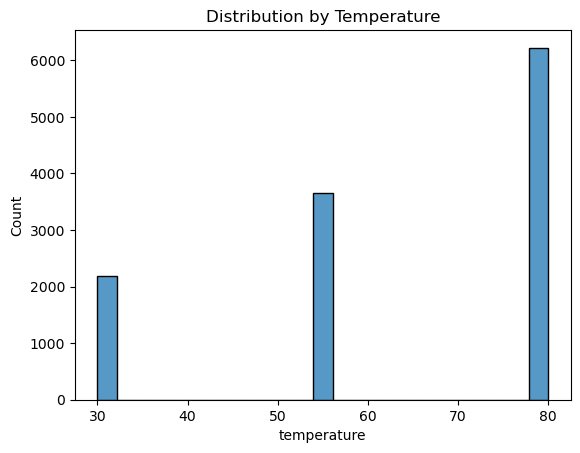

In [9]:
sns.histplot(data= data, x ="temperature")
plt.title("Distribution by Temperature")
#temperature is only three discrete values of 30, 55 or 80

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
# Create data frame coupon = Bar
data_bar = data.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [11]:
print("Percent acceptance of bar coupon :", "{:.2%}".format((data_bar['Y'].value_counts()[1] / data_bar['Bar'].value_counts().sum()) ))

Percent acceptance of bar coupon : 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [12]:
#calculate dataframes with total 3 or fewer and more than 3 bar visits
data_bar_3few= data_bar.loc[(data_bar['Bar'] == "never") | (data_bar['Bar'] == "less1")| (data_bar['Bar'] == "1~3")]
data_bar_3more = data_bar.loc[(data_bar['Bar'] == "4~8") | (data_bar['Bar'] == "gt8")]

#calculate percent acceptance for each catagorey
print("Acceptance with 3 or fewer bar visists per month:","{:.2%}".format(data_bar_3few['Y'].value_counts()[1]/len(data_bar_3few)))
print("Acceptance with more than 3 bar visists per month:","{:.2%}".format(data_bar_3more['Y'].value_counts()[1]/len(data_bar_3more)))


Acceptance with 3 or fewer bar visists per month: 37.27%
Acceptance with more than 3 bar visists per month: 76.17%


In [13]:
#Findings - People that visit the bar more than 3 times per month are more likely to accept the coupons.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [14]:
#create a dataframe of vists more than once per month and over 25 age. 
data_bar_1more = data_bar.loc[(data_bar['Bar'] != "never") & (data_bar['Bar'] != "less1")]
data_bar_1more = data_bar_1more.loc[(data_bar_1more['age'] != "21") & (data_bar_1more['age'] != "below21")]

print("Acceptance with more than 1 bar visists per month and over 25 age:","{:.2%}".format(data_bar_1more['Y'].value_counts()[1]/len(data_bar_1more)))


Acceptance with more than 1 bar visists per month and over 25 age: 68.98%


In [15]:
#Findings - The acceptance rates is more than for the 3 or fewer visits and less than the 3 or visit cohort. 

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [16]:
#create a dataframe of vists more than once per month, had non-kid passaenger and occupation not farming/fishing/forestry. 
data_bar_5= data_bar.loc[(data_bar['Bar'] != "never") &
                        (data_bar['Bar'] != "less1") &
                        (data_bar['passanger'] != "Alone") &
                        (data_bar['passanger'] != "Kid(s)") &
                        (data_bar['occupation'] != "Farming Fishing & Forestry") ]

percent_5 = data_bar_5['Y'].value_counts()[1]/len(data_bar_5)

print("Acceptance with more than 1 bar visists per month and over 25 age:","{:.2%}".format(percent_5))


Acceptance with more than 1 bar visists per month and over 25 age: 71.43%


In [17]:
#Findings - This cobmination had a slightly higher acceptance rate

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [18]:
#create a dataframe for condition 1 
#go to bars more than once a month, had passengers that were not a kid, and were not widowed
data_bar_cond1= data_bar.loc[(data_bar['Bar'] != "never") &
                        (data_bar['Bar'] != "less1") &
                        (data_bar['passanger'] != "Alone") &
                        (data_bar['passanger'] != "Kid(s)") &  
                        (data_bar['maritalStatus'] != "Widowed")]
percent_cond1 = data_bar_cond1['Y'].value_counts()[1]/len(data_bar_cond1)
print("Acceptance that go to bars more than once a month, had passengers that were not a kid, and were not widowed:","{:.2%}".format(percent_cond1))

#create a dataframe for condition 2 
#go to bars more than once a month and are under the age of 30
data_bar_cond2= data_bar.loc[(data_bar['Bar'] != "never") &
                        (data_bar['Bar'] != "less1") &
                        (data_bar['age'] != "50plus") &
                        (data_bar['age'] != "46") &  
                        (data_bar['age'] != "41") &
                        (data_bar['age'] != "36") &    
                        (data_bar['age'] != "31")]
percent_cond2 = data_bar_cond2['Y'].value_counts()[1]/len(data_bar_cond2)
print("Acceptance go to bars more than once a month and are under the age of 30:","{:.2%}".format(percent_cond2))

#create a dataframe for condition 3 
#go to cheap restaurants more than 4 times a month and income is less than 50K
data_bar_cond3= data_bar.loc[(data_bar['Bar'] != "never") &
                        (data_bar['RestaurantLessThan20'] != "never") &
                        (data_bar['RestaurantLessThan20'] != "less1") &
                        (data_bar['RestaurantLessThan20'] != "1~3") &  
                        (data_bar['income'] != "$50000 - $62499") &
                        (data_bar['income'] != "$75000 - $87499") & 
                        (data_bar['income'] != "$100000 or More") &    
                        (data_bar['income'] != "$62500 - $74999") &   
                        (data_bar['income'] != "$87500 - $99999")]
percent_cond3 = data_bar_cond3['Y'].value_counts()[1]/len(data_bar_cond3)
print("Acceptance go to cheap restaurants more than 4 times a month and income is less than 50K:","{:.2%}".format(percent_cond3))

Acceptance that go to bars more than once a month, had passengers that were not a kid, and were not widowed: 71.43%
Acceptance go to bars more than once a month and are under the age of 30: 71.95%
Acceptance go to cheap restaurants more than 4 times a month and income is less than 50K: 66.31%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [19]:
# All of the combinations test had a higher bar coupon acceptance rate than the overall rate of 41%
# the highest acceptance was from individuals that visit a bar more than 3 times per month. 
# The second highest groups visited bars at least 1 time per month and other attributes such as:
# Over 25, had passangers that weren't kids, go to cheap restaurants and make < $50k.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Evaluation of acceptance for Restaurants LessThan 20

In [20]:
#Create Dataframe with only "Restaurant(<20)" coupons
df_rest20 = data.query('coupon == "Restaurant(<20)"')
print("The coupon reastaurant < $20  contains:", len(df_rest20), "rows")

The coupon reastaurant < $20  contains: 2653 rows


In [43]:
#Calculate the overal coupon acceptance rate for the group. 
overall = df_rest20['Y'].value_counts()[1] / len(df_rest20)
print("Percent accepting coupon:", "{:.2%}".format(overall ))

Percent accepting coupon: 70.90%


### Investigate acceptance for various categories
#### Income , Age, Gender, Marital Status, Weather, Time



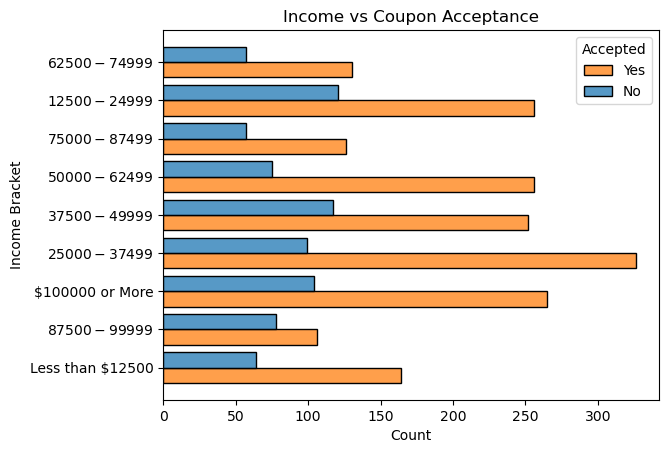

In [22]:
# Look at histogram of income vs coupon acceptance
sns.histplot(data = df_rest20, y = "income", hue = "Y", multiple = "dodge", shrink = 0.8)
plt.ylabel('Income Bracket')
plt.title('Income vs Coupon Acceptance')
plt.legend(title='Accepted', loc='upper right', labels=['Yes', 'No'])

The acceptance appears less in incomes 75,000 to  99,999 

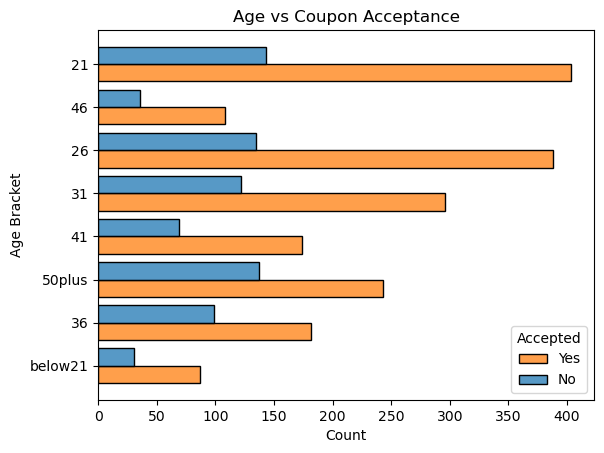

In [23]:
# Look at histogram of age vs coupon acceptance
sns.histplot(data = df_rest20, y = "age", hue = "Y", multiple = "dodge", shrink = 0.8)
plt.ylabel('Age Bracket')
plt.title('Age vs Coupon Acceptance')
plt.legend(title='Accepted', loc='lower right', labels=['Yes', 'No'])

The acceptance is lower in the 50plus category and best in the 26 and younger. 

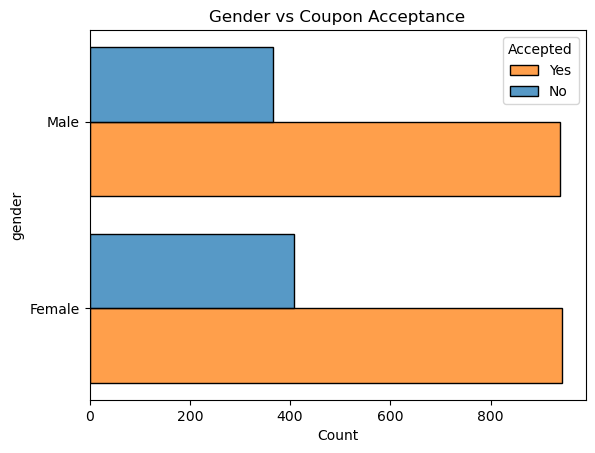

In [66]:
# Look at histogram of gender vs coupon acceptance
sns.histplot(data = df_rest20, y = "gender", hue = "Y", multiple = "dodge", shrink = 0.8)
plt.title('Gender vs Coupon Acceptance')
plt.legend(title='Accepted', loc='upper right', labels=['Yes', 'No'])

There is no significant acceptance difference from gender

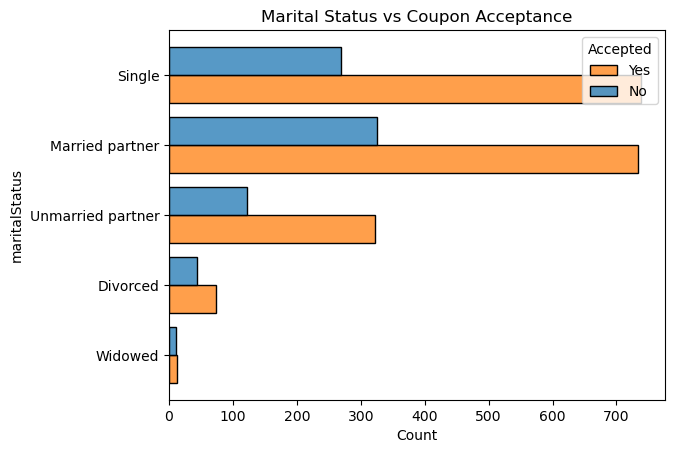

In [65]:
# Look at histogram of Marital Status vs coupon acceptance
sns.histplot(data = df_rest20, y = "maritalStatus", hue = "Y", multiple = "dodge", shrink = 0.8)
plt.title('Marital Status vs Coupon Acceptance')
plt.legend(title='Accepted', loc='upper right', labels=['Yes', 'No'])

The acceptance from matial status is not significant, single and married parnter are close. 

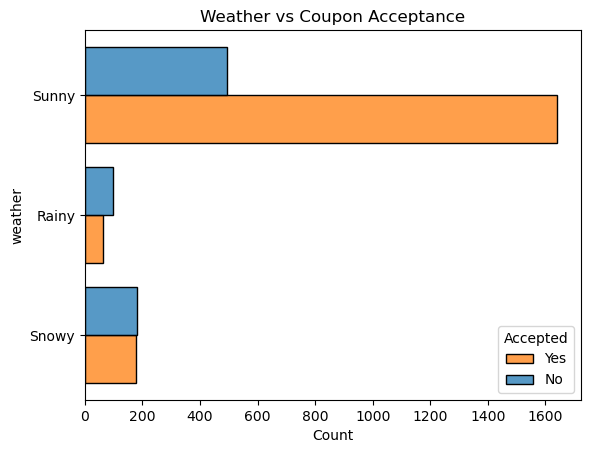

In [26]:
# Look at histogram Weather vs coupon acceptance
sns.histplot(data = df_rest20, y = "weather", hue = "Y", multiple = "dodge", shrink = 0.8)
plt.title('Weather vs Coupon Acceptance')
plt.legend(title='Accepted', loc='lower right', labels=['Yes', 'No'])

Sunny weather is a huge factor!

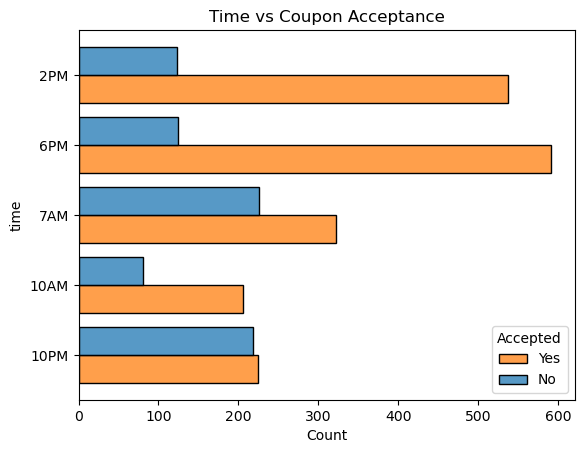

In [27]:
# Look at histogram Time vs coupon acceptance
sns.histplot(data = df_rest20, y = "time", hue = "Y", multiple = "dodge", shrink = 0.8)
plt.title('Time vs Coupon Acceptance')
plt.legend(title='Accepted', loc='lower right', labels=['Yes', 'No'])

Early morning 7am and late evening 10 pm are the times with least acceptance rates

### Make 2 new target groups based on the initial screening and compare 
### the acceptance rate to the total survey poplulation

#### Target Group 1 - Income less than  75,000 and age less than 50

In [36]:
#### Target Goup 1 - Income , 75,000 and age less than 50
group_1= df_rest20.loc[(df_rest20['income'] != "$100000 or More") &
                        (df_rest20['income'] != "$87500 - $99999") &
                        (df_rest20['income'] != "$75000 - $87499") &
                        (df_rest20['age'] != "50plus")]
group_1_per = group_1['Y'].value_counts()[1]/len(group_1)
print("Acceptance rate of Target Goup 1:","{:.2%}".format(group_1_per))

Acceptance rate of Target Goup 1: 73.97%


#### Cohort Number 2 - Weather sunny and time after 7 am and before 10 pm

In [42]:
#### Target Group 2 - Weather sunny and time after 7 am and before 10 pm
group_2= df_rest20.loc[(df_rest20['weather'] != "Rainy") &
                        (df_rest20['weather'] != "Snowy") &
                        (df_rest20['time'] != "10PM") &
                        (df_rest20['time'] != "7AM")]
group_2_per = group_2['Y'].value_counts()[1]/len(group_2)
print("Acceptance rate of target Group 2:","{:.2%}".format(group_2_per))

Acceptance rate of target Group 2: 80.85%


Compare the acceptance rate for total group, group 1 and group 2

In [63]:
#bar chart of group acceptance rates
summary = pd.DataFrame({"acceptance":[overall,group_1_per,group_2_per]},
                        index =["Overall Group", "Target Group 1", "Target Group2"])
fig = px.bar(summary, y= "acceptance", text_auto = True, text = 'acceptance', title="Coupon Acceptance per Group",
            labels= {"acceptance" :"Coupon Acceptance %","index":"Group"})
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.show()

Findings : 
    - The overal accptance of the restaurant < 20 coupon was 70.9%
    - Target goup 1 focused on demographics and included salary earings < 75,000 and age < 50 years. 
        This Group had an increased rate of 74%
    - Target group 2 focused on weather and time included sunny weather and time after 7 am and before 10 pm.
        This group had an increase acceptance rate of 80.9%

***

### Findings - Individual Investigation
#### The Restaurants less than $20

<b>Data Source:</b> UCI Machine Learning repository, data collected via a survey on Amazon Mechanical Turk and costumers acceptance of coupons while driving in the vicinity of merchants. 

<b>Data Cleaning:</b> The null data was removed based on still retaining a significant amount of the data for the investigations. 

<b>Investigation Process:</b> The accepted and non-accepted coupons were graphed for visual observation of correlation of acceptance of the coupons. The categories graphed included; Income, Age, Gender, Marital Status, Weather, Time of Day. 

<b>Findings:</b> 
- Income had some correlation on the acceptance rate with higher on the < $75,000 income. 
- Age had some correlation on the acceptance rate with lower on the 50 years plus category.
- Gender was not a factor on the acceptance rate
- Martial status was not a significant factor on acceptance rate. 
- Weather was a large factor with sunny weather significantly increasing the acceptance rate. 
- Time of Day was a factor with lower acceptance before 7 am and after 10 pm. 

<b>Target Groups:</b>
Two target groups were setup to test the change in acceptance rate compared to the average. 
Target Group 1 was based on demographics with income < $75,000 and age < 50 yrs. The acceptance rate went up from 70.9% to 74%
Target Group 2 was based on weather and time with sunny weather and after 7 am and before 10pm. The acceptance rate went up from 70.9% to 80.9%

<b>Next steps:</b>
Next steps would be to convert the identified categories (income, age, weather & time) from strings to numerical values.
The numerical substitutions would allow for use in ML.
